In [17]:
from SOH_func import *
import matplotlib.pyplot as pl
from tensorflow import keras
from keras import models, layers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# from sklearn.preprocessing import StandardScaler

# %load_ext tensorboard

In [18]:
FILE_00 = 'CYCLE_CSV_data.csv'
FILE_01 = 'CYCLE_CSV_data01.csv'
FILE_02 = 'CYCLE_CSV_data02.csv'
# drop_labels = ['시험_시간(s)', '사이클_번호', '사이클_시간(s)', '단계_번호', '단계_시간(s)', '인덱스', '보조전압1(V)', '보조전압2(V)', '보조전압3(V)', '온도(\'C)', '누적_용량(Ah)', '전류_범위', 'OCP(V)', '파워(W)', '부하(Ohm)']
drop_labels_x = ['인덱스', '사이클_번호', '충전_용량(Ah)', '누적_용량(Ah)', '충전_에너지(Wh)', '누적_에너지(Wh)', '쿨롱_효율(%)', '에너지_효율(%)', '최대_전압(V)', '충전_최종전압(V)', '단위_충전_용량(Ah/g)', '단위_방전_용량(Ah/g)']
drop_labels_y = ['인덱스', '사이클_번호', '충전_용량(Ah)', '누적_용량(Ah)', '충전_에너지(Wh)', '방전_에너지(Wh)', '누적_에너지(Wh)', '쿨롱_효율(%)', '에너지_효율(%)', '최대_전압(V)', '충전_최종전압(V)', '방전_최종전압(V)', '단위_충전_용량(Ah/g)', '단위_방전_용량(Ah/g)']

Index(['방전_용량(Ah)', '방전_에너지(Wh)', '방전_최종전압(V)'], dtype='object')
Index(['방전_용량(Ah)'], dtype='object')
Index(['방전_용량(Ah)', '방전_에너지(Wh)', '방전_최종전압(V)'], dtype='object')
Index(['방전_용량(Ah)'], dtype='object')
Index(['방전_용량(Ah)', '방전_에너지(Wh)', '방전_최종전압(V)'], dtype='object')
Index(['방전_용량(Ah)'], dtype='object')
data00 = (510, 3)
data01 = (480, 3)
data_test = (480, 3)


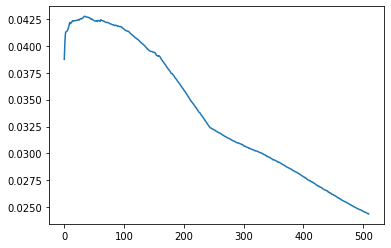

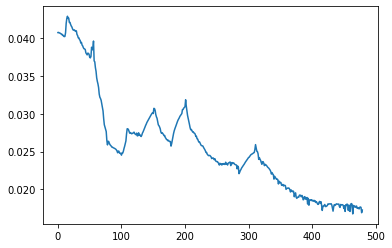

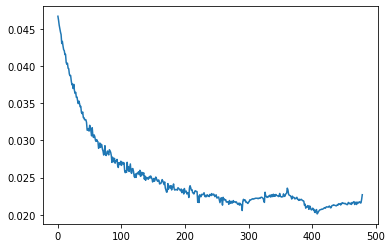

In [19]:
data00, data_cap00 = get_data(FILE_00, drop_labels_x, drop_labels_y)
data01, data_cap01 = get_data(FILE_01, drop_labels_x, drop_labels_y)
data_test, data_cap_test = get_data(FILE_02, drop_labels_x, drop_labels_y)
data01 = data01[70:]
data_cap01 = data_cap01[70:]
data_test = data_test[70:]
data_cap_test = data_cap_test[70:]
print(f'data00 = {data00.shape}')
pl.plot(data_cap00)
pl.show()
print(f'data01 = {data01.shape}')
pl.plot(data_cap01)
pl.show()
print(f'data_test = {data_test.shape}')
pl.plot(data_cap_test)
pl.show()

In [20]:
param = {'seq_len' : 25, 'sample_len' : 25, 'num_units' : 64, 'num_filters' : 64, 'window' : 3, 'drop_rate' : 0.2, 'num_epochs' : 4000}
x_train00, y_train00, num_batch00  = seq_gen(data00, data_cap00, param['seq_len'])
x_train01, y_train01, num_batch01  = seq_gen(data01, data_cap01, param['seq_len'])
x_test, y_test, num_batch_test  = seq_gen(data_test, data_cap_test, param['seq_len'])
print(x_train00.shape)

num_batch = 20
x = (20, 25, 3)
y = (20, 25, 1)
num_batch = 19
x = (19, 25, 3)
y = (19, 25, 1)
num_batch = 19
x = (19, 25, 3)
y = (19, 25, 1)
(20, 25, 3)


In [21]:
model = models.Sequential()
model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
model.add(layers.LSTM(param['num_units'], return_sequences = True))
model.add(layers.TimeDistributed(layers.Dense(1)))
model.compile(loss = 'mse', optimizer = 'Adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, None, 64)          640       
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          33024     
                                                                 
 time_distributed_2 (TimeDis  (None, None, 1)          65        
 tributed)                                                       
                                                                 
Total params: 33,729
Trainable params: 33,729
Non-trainable params: 0
_________________________________________________________________


In [22]:
epoch_index = 0
loss_dict = {}
epoch_index += param['num_epochs']
callback_list = [ModelCheckpoint(filepath = f'Checkpoints\SOH_Checkpoint_{epoch_index}.h5', monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(x_train00, y_train00, epochs=param['num_epochs'], verbose = 2, validation_split=0.3, callbacks=callback_list)

Epoch 1/4000
1/1 - 1s - loss: 0.0013 - val_loss: 0.0047 - 1s/epoch - 1s/step
Epoch 2/4000
1/1 - 0s - loss: 0.0035 - val_loss: 0.0017 - 32ms/epoch - 32ms/step
Epoch 3/4000
1/1 - 0s - loss: 9.6330e-04 - val_loss: 3.9752e-05 - 37ms/epoch - 37ms/step
Epoch 4/4000
1/1 - 0s - loss: 1.9352e-04 - val_loss: 7.2983e-04 - 18ms/epoch - 18ms/step
Epoch 5/4000
1/1 - 0s - loss: 0.0014 - val_loss: 6.6607e-04 - 16ms/epoch - 16ms/step
Epoch 6/4000
1/1 - 0s - loss: 0.0013 - val_loss: 9.0947e-05 - 16ms/epoch - 16ms/step
Epoch 7/4000
1/1 - 0s - loss: 3.8431e-04 - val_loss: 2.0668e-04 - 17ms/epoch - 17ms/step
Epoch 8/4000
1/1 - 0s - loss: 5.8890e-05 - val_loss: 9.7534e-04 - 17ms/epoch - 17ms/step
Epoch 9/4000
1/1 - 0s - loss: 4.7866e-04 - val_loss: 0.0014 - 16ms/epoch - 16ms/step
Epoch 10/4000
1/1 - 0s - loss: 8.0300e-04 - val_loss: 0.0011 - 16ms/epoch - 16ms/step
Epoch 11/4000
1/1 - 0s - loss: 5.8986e-04 - val_loss: 4.9611e-04 - 17ms/epoch - 17ms/step
Epoch 12/4000
1/1 - 0s - loss: 1.8347e-04 - val_loss: 7

In [23]:
epoch_index += param['num_epochs']
callback_list = [ModelCheckpoint(filepath = f'Checkpoints\SOH_Checkpoint_{epoch_index}.h5', monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 2, validation_split=0.3, callbacks=callback_list)

Epoch 1/4000
1/1 - 0s - loss: 5.0984e-06 - val_loss: 3.0977e-05 - 44ms/epoch - 44ms/step
Epoch 2/4000
1/1 - 0s - loss: 1.6130e-05 - val_loss: 1.2698e-05 - 32ms/epoch - 32ms/step
Epoch 3/4000
1/1 - 0s - loss: 1.8795e-05 - val_loss: 1.8137e-05 - 17ms/epoch - 17ms/step
Epoch 4/4000
1/1 - 0s - loss: 8.5089e-06 - val_loss: 4.3360e-06 - 33ms/epoch - 33ms/step
Epoch 5/4000
1/1 - 0s - loss: 1.5186e-06 - val_loss: 4.9092e-06 - 17ms/epoch - 17ms/step
Epoch 6/4000
1/1 - 0s - loss: 6.5779e-06 - val_loss: 1.7655e-05 - 17ms/epoch - 17ms/step
Epoch 7/4000
1/1 - 0s - loss: 1.1326e-05 - val_loss: 4.7315e-06 - 17ms/epoch - 17ms/step
Epoch 8/4000
1/1 - 0s - loss: 6.1631e-06 - val_loss: 1.9861e-06 - 31ms/epoch - 31ms/step
Epoch 9/4000
1/1 - 0s - loss: 1.1197e-06 - val_loss: 6.1167e-06 - 17ms/epoch - 17ms/step
Epoch 10/4000
1/1 - 0s - loss: 4.4438e-06 - val_loss: 6.4616e-06 - 18ms/epoch - 18ms/step
Epoch 11/4000
1/1 - 0s - loss: 7.2368e-06 - val_loss: 3.9331e-06 - 17ms/epoch - 17ms/step
Epoch 12/4000
1/1 -

1/1 [==============================] - 0s 198ms/step
(475, 1) (475, 1)
Estimation-64FL-64UN-4000EP-25SQ


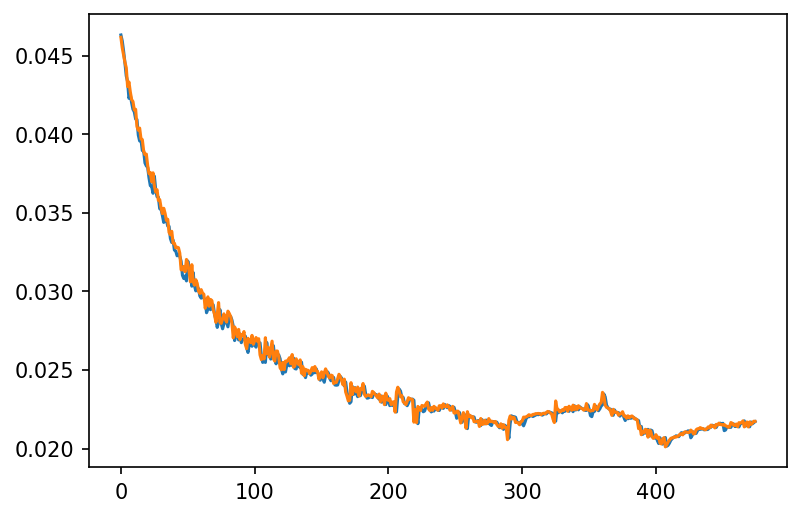

In [24]:
show_and_proof(model, epoch_index, x_test, y_test, loss_dict, param)